In [43]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf
import math

In [44]:
def cdf(x,mu,std):
    z = (x - mu) / (std * math.sqrt(2))  
    cdf_value = 0.5 * (1 + erf(z))  
    return cdf_value

In [45]:
def run():
    #data
    mu = 0
    std = 1 
    x = np.random.normal(loc=mu, scale=std,size = (3,3))
    n_getx2 = np.array((0,1,0))
    # mean = 0
    T = np.dot(n_getx2.T,x)
    CDF = cdf(T,mu,std)
    p_value = 2*np.min([CDF,1-CDF])
    return p_value

hypothesis mean = 0 :  872 TRUE
hypothesis mean = 0 :  128 FALSE
Rejection rate 0.13


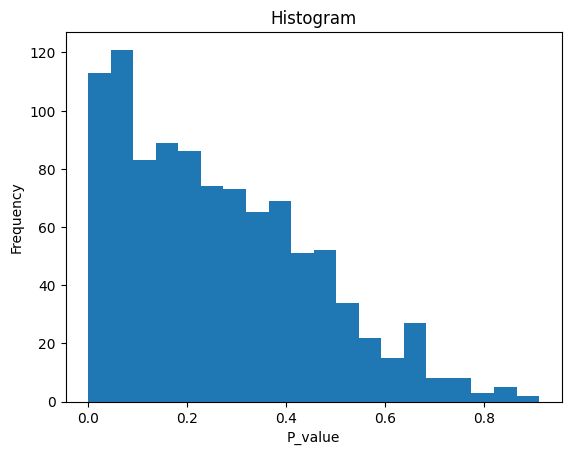

In [46]:
if __name__ == '__main__':
    mu_true,mu_false=0,0
    all = 1000
    list_p_value = []
    for _ in range(all):
        p_value = run()
        list_p_value.append(round(p_value.item(),3))
        if p_value<=0.05:
            mu_false+=1
        else:
            mu_true+=1
   
    print("hypothesis mean = 0 : ", mu_true,'TRUE')
    print("hypothesis mean = 0 : ", mu_false,'FALSE')
    print('Rejection rate %.2f' % (mu_false/all))

    plt.hist(list_p_value,bins = 20)
    plt.xlabel("P_value") 
    plt.ylabel("Frequency")
    plt.title("Histogram")
    plt.show()  